<a href="https://colab.research.google.com/github/lmoroney/tfbook/blob/master/chapter6/emotion_classifier_binary.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

In [0]:
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass


In [0]:
import tensorflow as tf
import csv

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [0]:
from bs4 import BeautifulSoup
import string

stopwords = ["a", "about", "above", "after", "again", "against", "all", "am", "an", "and", "any", "are", "as", "at",
             "be", "because", "been", "before", "being", "below", "between", "both", "but", "by", "could", "did", "do",
             "does", "doing", "down", "during", "each", "few", "for", "from", "further", "had", "has", "have", "having",
             "he", "hed", "hes", "her", "here", "heres", "hers", "herself", "him", "himself", "his", "how",
             "hows", "i", "id", "ill", "im", "ive", "if", "in", "into", "is", "it", "its", "itself",
             "lets", "me", "more", "most", "my", "myself", "nor", "of", "on", "once", "only", "or", "other", "ought",
             "our", "ours", "ourselves", "out", "over", "own", "same", "she", "shed", "shell", "shes", "should",
             "so", "some", "such", "than", "that", "thats", "the", "their", "theirs", "them", "themselves", "then",
             "there", "theres", "these", "they", "theyd", "theyll", "theyre", "theyve", "this", "those", "through",
             "to", "too", "under", "until", "up", "very", "was", "we", "wed", "well", "were", "weve", "were",
             "what", "whats", "when", "whens", "where", "wheres", "which", "while", "who", "whos", "whom", "why",
             "whys", "with", "would", "you", "youd", "youll", "youre", "youve", "your", "yours", "yourself",
             "yourselves"]

table = str.maketrans('', '', string.punctuation)

In [5]:
!wget --no-check-certificate --no-cache \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/binary-emotion.csv \
    -O /tmp/binary-emotion.csv

--2020-04-15 00:39:15--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/binary-emotion.csv
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.197.128, 2607:f8b0:400e:c08::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.197.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2690504 (2.6M) [application/octet-stream]
Saving to: ‘/tmp/binary-emotion.csv’

/tmp/binary-emotion 100%[===================>]   2.57M  --.-KB/s    in 0.02s   

2020-04-15 00:39:15 (171 MB/s) - ‘/tmp/binary-emotion.csv’ saved [2690504/2690504]



In [6]:
sentences=[]
labels=[]
with open('/tmp/binary-emotion.csv', encoding='UTF-8') as csvfile:
  reader = csv.reader(csvfile, delimiter=",")
  for row in reader:
    labels.append(int(row[0]))
    sentence = row[1].lower()
    sentence = sentence.replace(",", " , ")
    sentence = sentence.replace(".", " . ")
    sentence = sentence.replace("-", " - ")
    sentence = sentence.replace("/", " / ")
    soup = BeautifulSoup(sentence)
    sentence = soup.get_text()
    words = sentence.split()
    filtered_sentence = ""
    for word in words:
        word = word.translate(table)
        if word not in stopwords:
            filtered_sentence = filtered_sentence + word + " "
    sentences.append(filtered_sentence)

print(len(labels))
print(len(sentences))



35327
35327


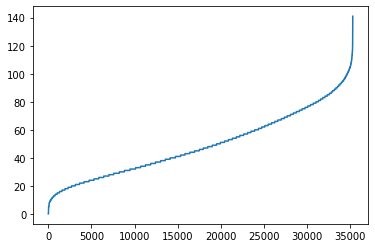

In [7]:
xs=[]
ys=[]
current_item=1
for item in sentences:
  xs.append(current_item)
  current_item=current_item+1
  ys.append(len(item))
newys = sorted(ys)

import matplotlib.pyplot as plt
plt.plot(xs,newys)
plt.show()


In [0]:
vocab_size = 2000
embedding_dim = 6
max_length = 100
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"
training_size = 28000

In [0]:
training_sentences = sentences[0:training_size]
testing_sentences = sentences[training_size:]
training_labels = labels[0:training_size]
testing_labels = labels[training_size:]

In [0]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)

word_index = tokenizer.word_index

training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

In [11]:
wc=tokenizer.word_counts
print(wc)

OrderedDict([('know', 1075), ('listenin', 7), ('bad', 589), ('habit', 4), ('earlier', 59), ('started', 72), ('freakin', 35), ('part', 88), ('layin', 2), ('n', 180), ('bed', 338), ('headache', 114), ('ughhhh', 7), ('waitin', 13), ('call', 199), ('wants', 125), ('hang', 63), ('friends', 279), ('soon', 326), ('want', 877), ('trade', 8), ('someone', 244), ('houston', 8), ('tickets', 78), ('no', 1623), ('one', 1111), ('will', 1017), ('re', 51), ('pinging', 4), ('didnt', 577), ('go', 1510), ('prom', 40), ('bc', 28), ('bf', 22), ('like', 1524), ('sleep', 425), ('not', 2258), ('thinking', 148), ('old', 244), ('friend', 215), ('married', 18), ('now', 1813), ('damn', 252), ('2', 815), ('scandalous', 1), ('hmmm', 40), ('djhero', 1), ('com', 960), ('charlene', 1), ('love', 1033), ('miss', 772), ('sorry', 593), ('least', 181), ('friday', 277), ('ugh', 227), ('beat', 34), ('stupid', 159), ('song', 173), ('get', 1686), ('next', 404), ('rude', 12), ('u', 954), ('watch', 257), ('hills', 15), ('london',

{'<OOV>': 1, 'just': 2, 'not': 3, 'now': 4, 'day': 5, 'get': 6, 'no': 7, 'good': 8, 'like': 9, 'go': 10, 'dont': 11, 'work': 12, 'today': 13, 'got': 14, 'cant': 15, 'going': 16, 'one': 17, 'know': 18, 'back': 19, 'time': 20, 'love': 21, 'really': 22, 'will': 23, 'lol': 24, 'com': 25, 'u': 26, 'see': 27, 'want': 28, 'can': 29, 'home': 30, 'new': 31, 'think': 32, '2': 33, 'still': 34, 'oh': 35, 'miss': 36, 'much': 37, 'off': 38, 'need': 39, 'night': 40, 'last': 41, 'feel': 42, 'sad': 43, 'wish': 44, 'hope': 45, 'sorry': 46, 'bad': 47, 'didnt': 48, 'great': 49, 'morning': 50, 'thanks': 51, 'haha': 52, 'tomorrow': 53, 'twitter': 54, 'happy': 55, '3': 56, 'right': 57, 'tonight': 58, 'though': 59, 'gonna': 60, 'week': 61, 'fun': 62, 'make': 63, 'better': 64, 'weekend': 65, 'getting': 66, 'way': 67, 'nice': 68, 'come': 69, 'school': 70, 'sleep': 71, 'yeah': 72, 'hate': 73, 'people': 74, 'next': 75, 'days': 76, 'wont': 77, 'even': 78, 'never': 79, 'working': 80, 'say': 81, 'long': 82, 'wait': 

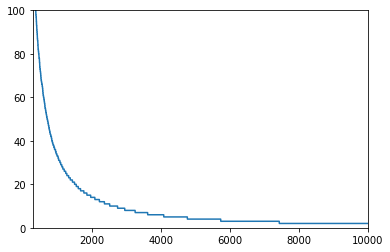

In [12]:
import matplotlib.pyplot as plt
wc = tokenizer.word_counts
from collections import OrderedDict
newlist = (OrderedDict(sorted(wc.items(), key=lambda t: t[1], reverse=True)))
print(word_index)
print(newlist)
xs=[]
ys=[]
curr_x = 1
for item in newlist:
  xs.append(curr_x)
  curr_x=curr_x+1
  ys.append(newlist[item])

print(ys)
plt.plot(xs,ys)
plt.axis([300,10000,0,100])
plt.show()


In [0]:

# Need this block to get it to work with TensorFlow 2.x
import numpy as np
training_padded = np.array(training_padded)
training_labels = np.array(training_labels)
testing_padded = np.array(testing_padded)
testing_labels = np.array(testing_labels)

In [0]:

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(8, kernel_regularizer=tf.keras.regularizers.l2(0.025), activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [32]:

num_epochs = 100
history = model.fit(training_padded, training_labels, epochs=num_epochs, validation_data=(testing_padded, testing_labels), verbose=2)

Epoch 1/100
875/875 - 3s - loss: 0.7447 - accuracy: 0.5235 - val_loss: 0.6639 - val_accuracy: 0.8241
Epoch 2/100
875/875 - 3s - loss: 0.6924 - accuracy: 0.5235 - val_loss: 0.6681 - val_accuracy: 0.8241
Epoch 3/100
875/875 - 3s - loss: 0.6921 - accuracy: 0.5235 - val_loss: 0.6680 - val_accuracy: 0.8241
Epoch 4/100
875/875 - 3s - loss: 0.6921 - accuracy: 0.5235 - val_loss: 0.6635 - val_accuracy: 0.8241
Epoch 5/100
875/875 - 3s - loss: 0.6920 - accuracy: 0.5235 - val_loss: 0.6671 - val_accuracy: 0.8241
Epoch 6/100
875/875 - 3s - loss: 0.6910 - accuracy: 0.5235 - val_loss: 0.6484 - val_accuracy: 0.8241
Epoch 7/100
875/875 - 3s - loss: 0.6752 - accuracy: 0.5909 - val_loss: 0.5245 - val_accuracy: 0.8248
Epoch 8/100
875/875 - 3s - loss: 0.6373 - accuracy: 0.6773 - val_loss: 0.5213 - val_accuracy: 0.8018
Epoch 9/100
875/875 - 3s - loss: 0.6107 - accuracy: 0.6996 - val_loss: 0.5490 - val_accuracy: 0.7542
Epoch 10/100
875/875 - 3s - loss: 0.5953 - accuracy: 0.7075 - val_loss: 0.4940 - val_accura

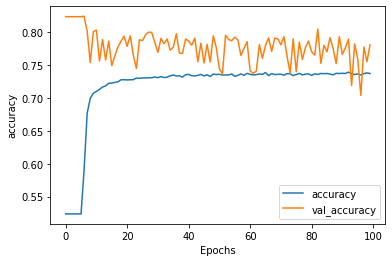

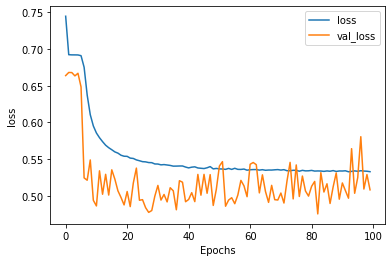

In [33]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [0]:
sentence = ["I'm really upset right now and not happy with you! ANGRY!", "She said yes! We're getting married! Wow!"]
sequences = tokenizer.texts_to_sequences(sentence)
print(sequences)
padded = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)
print(model.predict(padded))